# Task

**Regression on the tabular data**

You have a dataset (internship_train.csv) that contains 53 anonymized features and a target column. Your task is to build model that predicts a target based on the proposed features. Please provide predictions for internship_hidden_test.csv file. Target metric is RMSE. The main goal is to provide github repository that contains:
* jupyter notebook with analysis; 
* code for modeling (Python 3); 
* file with model predictions; 
* readme file;
* requirements.txt file.


# Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import os

pd.pandas.set_option('display.max_columns', None)

# Upload Train Data

In [14]:
# working dir is where file located
os.chdir(os.path.dirname(os.path.abspath('__file__')))
os.getcwd()

'/mnt/DATA/diakap/Quantum_Test/Linear_Regression_Task'

In [15]:
# find train files
for root, dirs, files  in os.walk(os.getcwd()):
    for f in files:
        if 'train' in f:
            PATH_TRAIN = os.path.abspath(os.path.abspath(root + '/' + f))

In [16]:
dataset = pd.read_csv(PATH_TRAIN)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,281,336,99,3.880098,1.797502,3.252475,12.131981,3.091361,5.630319,4.466373,2.511203,5.982724,4.541159,12.740476,12.634929,4.050294,11.827245,3.568321,13.420537,8.251807,2.287900,14.834430,0.082253,2.975561,5.223753,1.212287,7.302797,7.083149,3.610350,7.767512,7.829657,8.395356,1.583711,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,109,123,130,12.099770,10.670550,14.137111,0.217037,1.426881,0.916617,8.168254,0.432319,5.872218,10.401401,12.843301,7.529992,12.525335,8.655344,8.499587,5.602552,4.187738,13.205982,5.432667,12.379275,11.938420,6.057282,2.581280,11.785456,4.445564,11.141346,0.839731,1.481908,8.920653,4.450379,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,488,138,80,2.947479,12.671352,13.279918,13.163338,9.051826,11.605822,11.094161,10.461813,9.827713,2.206019,9.914789,4.448482,8.864810,10.837476,14.167872,13.456857,14.855511,7.596095,4.928033,2.439930,6.791165,8.709536,1.363087,4.980975,2.182372,14.673614,8.083289,6.601472,6.789200,12.982035,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,111,38,177,5.368252,6.765946,0.544415,7.175573,14.515096,1.901743,9.231263,9.600810,10.058844,5.680021,8.238473,0.272760,11.892743,4.030567,14.946749,7.121632,6.507572,12.462688,12.222522,0.318528,5.350321,3.143358,10.291804,13.105170,10.159100,3.671488,11.087198,1.289054,0.249375,2.967133,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,141,417,343,14.592218,6.483629,9.159313,5.083046,8.772015,7.687242,11.106926,13.926358,0.914295,1.418124,4.504223,6.158475,1.790923,7.049614,14.409808,11.615837,5.675790,9.136146,10.640432,14.051122,2.240417,3.271828,5.061455,3.679880,2.948615,6.419577,14.873100,14.806887,9.992545,3.701959,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


## Check general info about dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

No nulls - it is great.

In [6]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,249.818967,249.346778,249.899900,7.483940,7.498037,7.496259,7.501635,7.486463,7.523043,7.475585,7.494835,7.503939,7.507724,7.508681,7.472421,7.519205,7.515753,7.509402,7.496781,7.504014,7.494212,7.490808,7.486936,7.514508,7.491614,7.520193,7.507801,7.493713,7.513840,7.507033,7.479579,7.519826,7.502483,7.512965,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,144.363827,144.476128,144.310495,4.330908,4.318388,4.338732,4.345618,4.318031,4.323500,4.327327,4.325447,4.330159,4.332599,4.328966,4.345228,4.339104,4.333907,4.331007,4.334982,4.318553,4.327286,4.322672,4.329524,4.329973,4.333144,4.335244,4.329515,4.327480,4.333543,4.327670,4.326175,4.315565,4.333881,4.329929,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000095,0.000252,0.000190,0.000192,0.000067,0.000229,0.000125,0.000382,0.000398,0.000140,0.000382,0.000129,0.000192,0.000017,0.000080,0.000161,0.000437,0.000041,0.000070,0.000074,0.000111,0.000067,0.000078,0.000018,0.000094,0.000020,0.000106,0.000105,0.000273,0.000315,0.000060,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,126.000000,124.000000,125.000000,3.723392,3.763626,3.718755,3.719537,3.758746,3.778857,3.733780,3.748951,3.760261,3.742810,3.768145,3.685140,3.760790,3.746467,3.772795,3.741697,3.774239,3.743116,3.763061,3.750034,3.778028,3.743842,3.752848,3.776405,3.755325,3.754465,3.771945,3.731527,3.784809,3.763004,3.768044,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,250.000000,249.000000,251.000000,7.483265,7.505267,7.502682,7.515240,7.467721,7.539462,7.460267,7.481500,7.521563,7.520793,7.520739,7.484349,7.526894,7.528984,7.494876,7.491009,7.500083,7.514475,7.483334,7.458614,7.513794,7.475324,7.550623,7.484699,7.472789,7.518614,7.504101,7.452493,7.532363,7.511806,7.507058,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,375.000000,375.000000,375.000000,11.242883,11.228331,11.258049,11.284618,11.238904,11.254751,11.211187,11.238128,11.248749,11.244657,11.240915,11.239795,11.276738,11.272683,11.271486,11.257988,11.233189,11.223296,11.229486,11.245719,11.272623,11.241922,11.261178,11.255442,11.251097,11.270277,11.241504,11.222543,11.241135,11.255483,11.272459,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.00000

What we have:
   * We have one binary feature(feature 8)
   * According to `describe()` any feature doesn't have outliers(further research it in more detail)
   * A lot features have similar distribution(almost equal max, mean, min, std)

## Correlation

In [8]:
dataset.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,1.000000,0.002009,0.001170,0.002957,-0.003764,-0.007362,0.007855,0.007174,0.008011,0.002339,0.000066,-1.815094e-03,0.000896,-0.000404,-0.000075,-0.000253,0.002622,0.006260,0.000741,0.002210,-0.000895,-0.007855,-2.258155e-03,0.004361,0.002187,-0.004042,0.005097,-0.003047,0.002541,-0.001587,-0.000414,0.006611,-0.002760,0.000027,0.008256,-0.004086,-0.004529,0.003246,0.000787,0.000185,-0.002930,0.003764,-0.000167,0.001234,-4.142468e-03,-6.524791e-03,0.003532,0.000310,-0.002639,0.004795,0.000287,-0.001647,-0.003612,0.002427
1,0.002009,1.000000,-0.001849,-0.004653,-0.002433,-0.002037,0.004181,0.005790,0.004095,0.002592,-0.002682,-7.803789e-05,0.001109,-0.004103,-0.001656,-0.000614,0.002029,0.002349,0.001863,0.000461,0.000178,-0.001536,-3.731582e-03,0.003922,-0.004662,0.003783,-0.003006,-0.001918,-0.002799,-0.004662,0.001058,-0.002409,0.005470,0.010357,-0.002004,-0.005055,-0.000449,-0.003830,0.002414,0.006489,-0.000481,-0.002569,0.007752,-0.002425,-2.874705e-03,-2.679358e-03,0.001402,-0.007900,-0.004497,0.002015,0.003119,0.006038,-0.003173,-0.005545
2,0.001170,-0.001849,1.000000,-0.000775,0.003082,-0.002161,0.002296,-0.000299,0.001983,0.005753,-0.002199,3.168891e-04,0.005324,0.002116,0.008375,0.003951,-0.001875,-0.000639,0.001350,-0.000633,-0.000888,-0.001534,-5.845828e-04,0.002231,0.000821,0.000266,-0.005920,0.002083,0.002801,-0.004899,0.001974,-0.002710,0.004933,-0.002065,0.005319,-0.000625,0.001144,0.003342,-0.001261,0.002653,-0.002015,0.002044,-0.002604,-0.001275,1.091757e-03,-5.881274e-04,0.000643,0.003106,0.001611,-0.001444,0.001006,-0.001753,0.002812,0.001003
3,0.002957,-0.004653,-0.000775,1.000000,-0.003623,-0.001038,0.000223,-0.004290,0.000966,0.000202,-0.004965,-3.672236e-04,0.000916,0.000080,0.003102,0.001020,-0.007037,-0.005790,0.007506,0.001275,-0.002047,0.000044,4.517820e-03,0.001132,0.002010,-0.006407,0.005319,-0.003369,-0.002658,-0.002173,0.001568,0.001985,0.003247,-0.003471,0.001715,-0.001856,0.001179,-0.004269,-0.003873,-0.004087,0.007568,0.004309,0.000720,0.000752,-5.875674e-03,4.776979e-03,0.001334,0.000528,0.006892,0.002790,0.002082,0.000373,0.002534,0.002807
4,-0.003764,-0.002433,0.003082,-0.003623,1.000000,-0.000992,0.005602,-0.004459,0.004763,-0.000778,-0.000388,1.953871e-03,-0.001668,-0.000544,0.002047,0.000488,0.001208,0.001100,-0.001374,-0.000336,0.002304,0.001397,2.999284e-03,0.001657,-0.008401,-0.002119,0.006148,-0.002811,0.000857,-0.002049,0.000079,0.003268,-0.005772,0.001476,0.001039,-0.000371,-0.006524,0.000780,-0.005631,0.002509,-0.008978,0.004317,-0.000019,-0.009656,-1.412970e-03,6.178204e-03,-0.000873,-0.002625,-0.001883,0.002884,-0.000702,0.001067,-0.002388,-0.001300
5,-0.007362,-0.002037,-0.002161,-0.001038,-0.000992,1.000000,-0.003869,-0.001455,-0.002289,0.004740,-0.003559,5.065116e-04,-0.000037,-0.002532,0.000901,-0.001526,0.001329,0.000324,0.000658,-0.002281,-0.000124,0.000868,-1.166420e-03,0.002663,0.005036,0.004169,0.005809,-0.000554,-0.004874,-0.001341,-0.000250,0.003361,0.006335,0.000679,-0.005939,0.005656,-0.000340,0.000682,0.000071,0.000860,0.004089,0.003336,-0.000008,-0.008769,-1.159929e-03,-5.225882e-03,-0.000776,-0.000087,-0.004682,0.000988,0.004735,-0.004100,0.004946,-0.002125
6,0.007855,0.004181,0.002296,0.000223,0.005602,-0.003869,1.000000,-0.002051,0.940016,-0.007185,0.001613,-2.230443e-04,-0.002390,-0.003157,-0.005814,-0.000298,-0.004747,-0.000960,-0.000464,0.003840,0.006525,-0.002993,8.003849e-04,0.003302,-0.001978,-0.002176,-0.003016,0.002847,-0.002015,-0.000106,0.002109,0.004690,0.006170,-0.005689,-0.006711,-0.003161,-0.003249,0.000200,0.001246,0.000057,-0.000819,0.002212,-0.003423,0.004318,5.795666e-04,-3.255019e-05,0.005084,-0.002972,-0.002300,0.003611,0.001542,-0.000944,0.002867,0.000666
7,0.007174,0.005790,-0.000299,-0.004290,-0.004459,-0.001455,-0.002051,1.000000,0.000779,-0.007187,-0.005711,5.164554e-03,0.003281,-0.

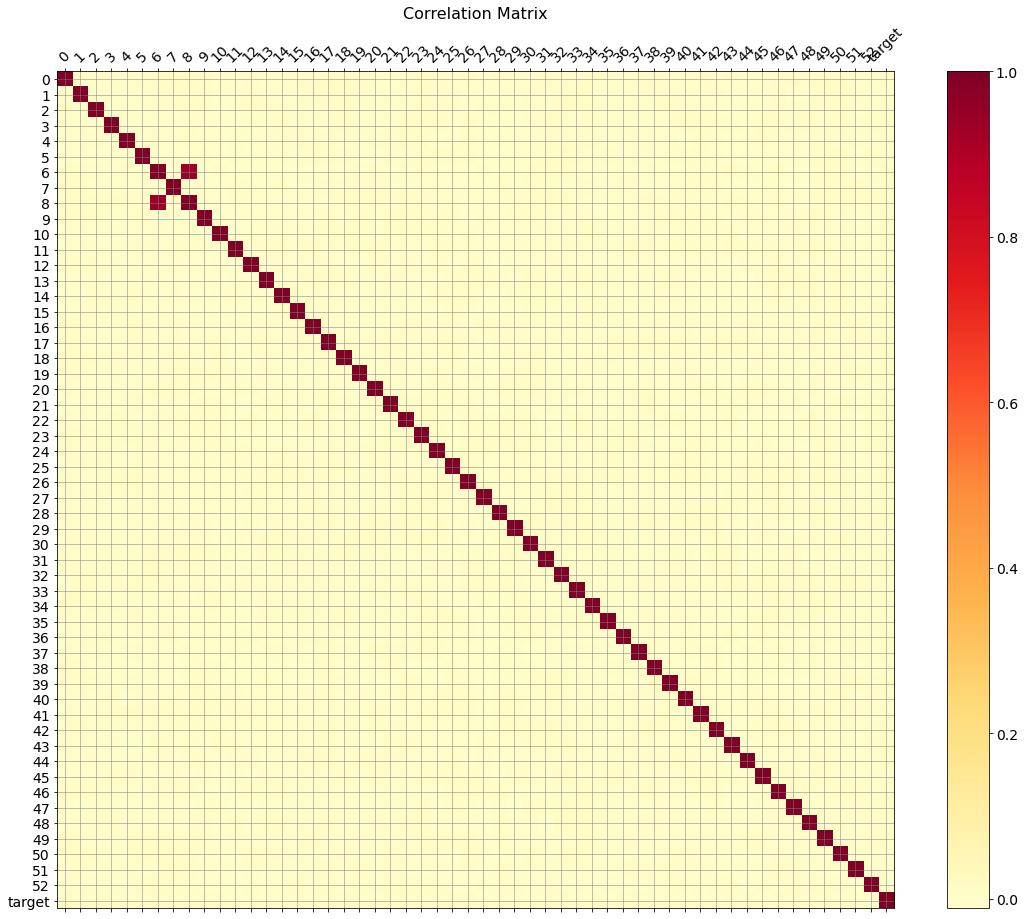

In [25]:
f = plt.figure(figsize=(19, 15))
plt.matshow(dataset.corr(), fignum=f.number, cmap=matplotlib.cm.YlOrRd)
plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize=14, rotation=45)
plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize=14)
plt.grid(color='gray', linewidth=0.5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

So, we have 2 strongly correlated feature: **6 and 8**

## Histogram


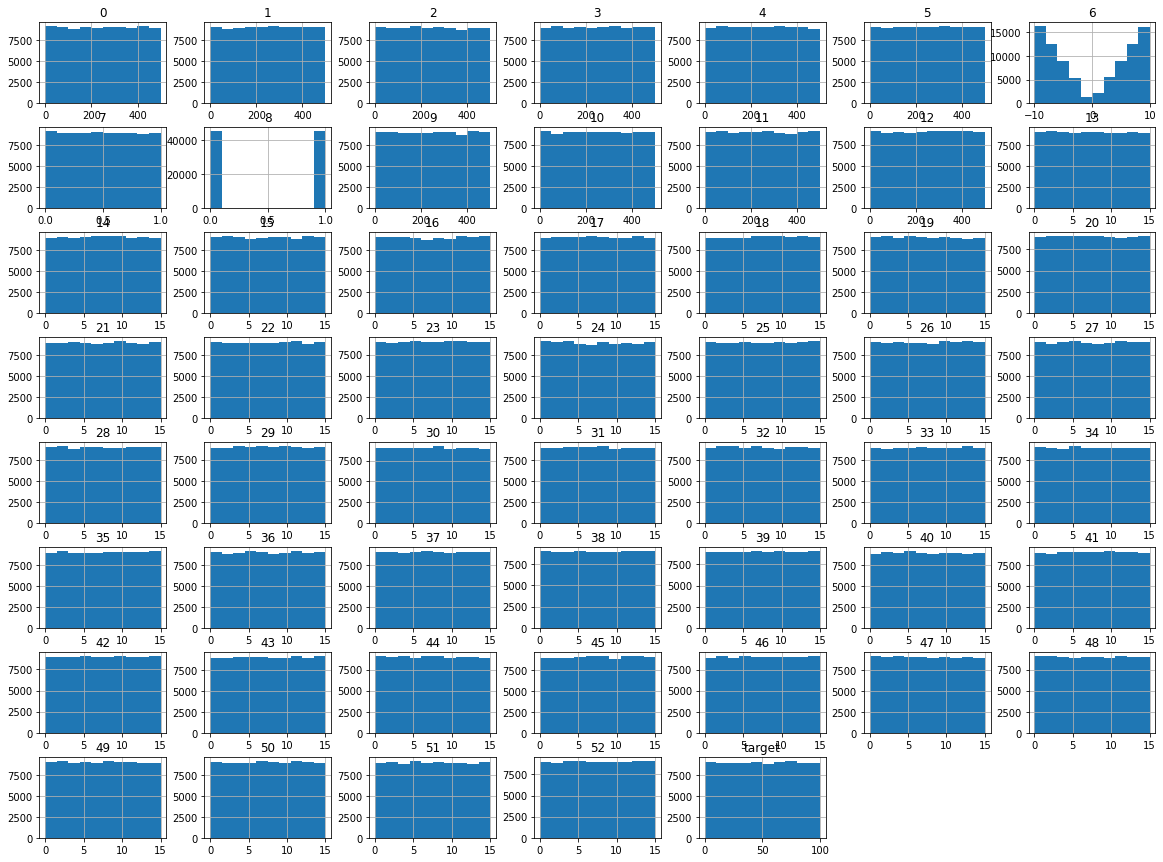

In [29]:
dataset.hist(figsize=(20, 15));

Almost all features have uniform distribution, include target. But feature 6 has different distribution, very similar to 8, but "smoother" version

## Box Distributions


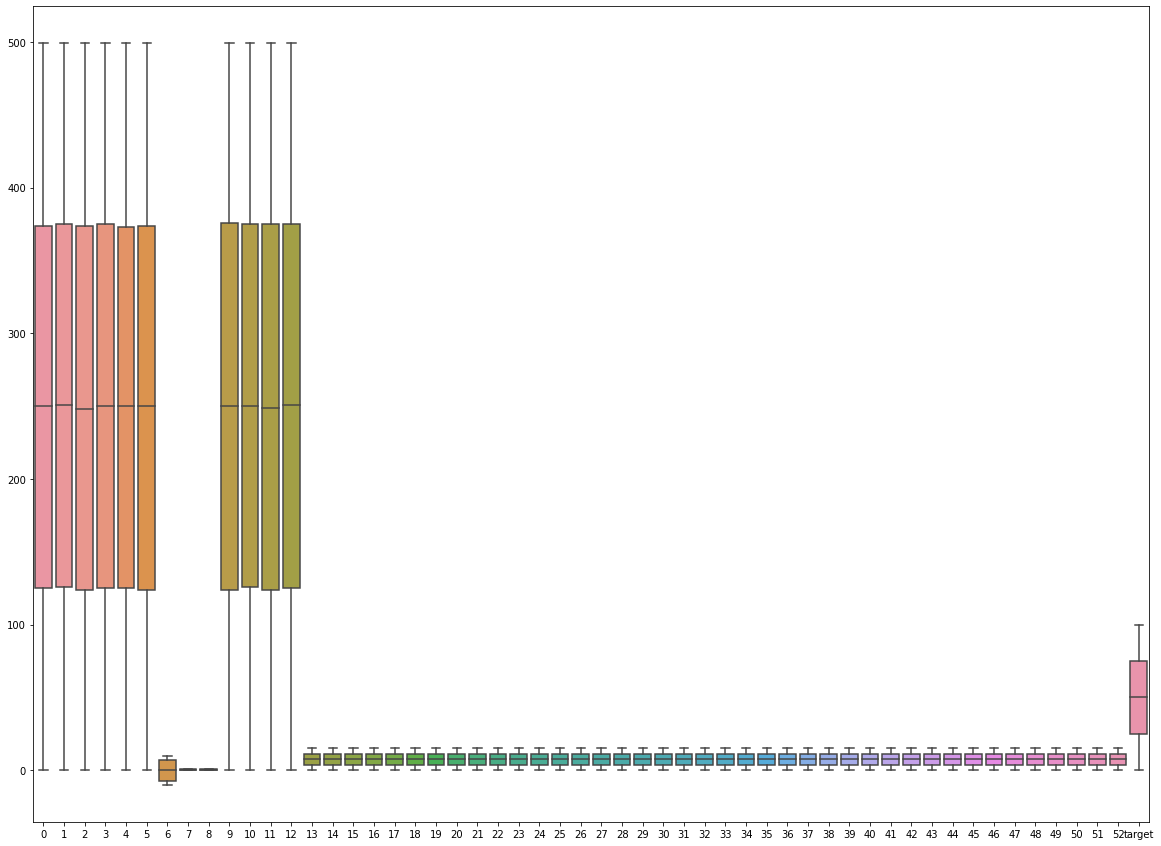

In [34]:
plt.figure(figsize=(20,15))

sns.boxplot(data=dataset);

What we have:
   * Several feature have similar distribution(features 0-5, 9-12 and 13-52). Features 6, 7, 8 and target have diffrent distribution.
   * Only feature 6 has negative numbers

# Conclusion
   * 6 and 8 have large correlation beetween (close to 0.95), so we should delete one, or merge it in some way, to avoid unstabilities in model
   * Major of features have similar distribution
   * No nulls and outliers in data, so we don't have to deal with it.